# Chapter III - I - 

## Count plots and bar Plots

The first two plots we'll look at are count plots and bar plots.

### Categorical Plots

Count plots and bar plots are two types of visualizations that Seaborn callls **"categorical plots"**. Categorical plots involve :

* **Categorical variable**, which is a variable that consists of a fixed, typically small number of possible values, or categories.
* These types of plots are commonly used when we want to make **comparisons** between different groups.

### .catplot()

**"catplot()"** offers the same flexibility that **"relplot()"** does, which means it will be easy to create subplots if we need to using the same **"col" and "row"** parameters.

<img src='pictures\countplotvscatplot.jpg' width=250 align="right" />

```python
# countplot()   vs catplot()
# To see how "catplot() works, let's return to the masculinity count plot."

import matplotlib.pyplot as plt 
import seaborn as sns

sns.countplot(x="how_masculine",
              data=masculinty_data)

plt.show()
```
</br>

--- 

To make this plot with **"catplot()"**, we change the function name to catplot() and use the **"kind"** parameter to specify what kind of categorical plot to use.

<img src='pictures\catplot.jpg' width=250 align="right" />


```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x="how_masculine",
            data=masculinity_data,
            kind="count")

plt.show()            
```

</br>


---

### Changing the order

Sometimes there is a specific ordering of categories that makes sense for these plots. In this case, it makes more sense for the categories to be in order from not masculine to very masculine. To change the order of the categories, create a list of category values in the order that you want them to appear, and then use the **"order"** parameter. This works for all types of categorical plots, not just count plots.

<img src='pictures\Changingorder.jpg' width=250 align="right" />

```python
import matplotlib.pyplot as plt
import seaborn as sns

category_order = ["No answer",
                  "Not at all",
                  "Not very",
                  "Somewhat",
                  "Very"]

sns.catplot(x="how_masculine",
            data=masculinity_data,
            kind="count",
            order=category_order)

plt.show()                              
```

</br>

---

### Bar plots

Bar plots look similar to count plots, but instead of the count of observations in each category, they show the mean of a quantitative variable among observations in each category.

This bar plot uses the **tips** dataset and shows the average bill paid among the people who visited the restaurant on each day of the week.

To create this bar plot, we use "catplot()". Specify the categorical variable "day" on x-axis, the quantitative variable "total bill" on the y-axis, and set the "kind" parameter equal to "bar".

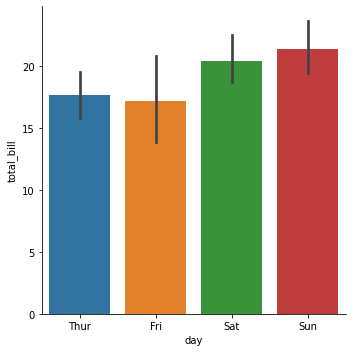

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tips Dataset
tips = sns.load_dataset('tips')

sns.catplot(x="day",
            y="total_bill",
            data=tips,
            kind="bar")

plt.show()

### Confidence Intervals

Notice also that Seaborn automatically shows 95% confidence intervals for these means. Just like with line plots, these confidence intervals shows us the level of uncertainty we have about these estimates.

Assuming our data is a random sample of some population, we can be 95% sure that the true population mean in each group lies within the confidence interval shown.

If we want to turn off these confidence intervals, we can do this by setting the "ci" parameter equal to "None" - just like we did with line plots.

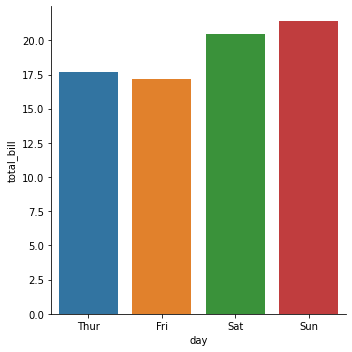

In [3]:
sns.catplot(x="day",
            y="total_bill",
            data=tips,
            kind="bar",
            ci=None)

plt.show()

### Changing the orientation

Finally, you can also change the orientation of the bars in bar plots and count plots by switching the x and y parameters. However, it is fairly common practice to put the categorical variable on the x-axis.

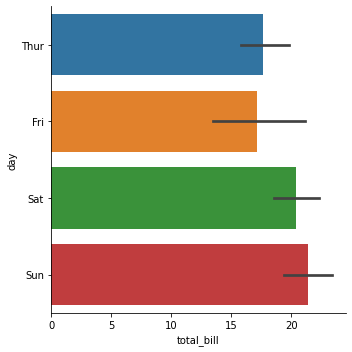

In [4]:
sns.catplot(x="total_bill",
            y="day",
            data=tips,
            kind="bar")

plt.show()

## Exercise I 

### Count Plots

In this exercise, we'll return to exploring our dataset that contains the responses to a survey sent out to young people. 

We might suspect that young people spend a lot of time on the internet, but how much do they report using the internet each day?

Let's use a count plot to break down the number of survey responses in each category and then explore wheter it changes based on age.

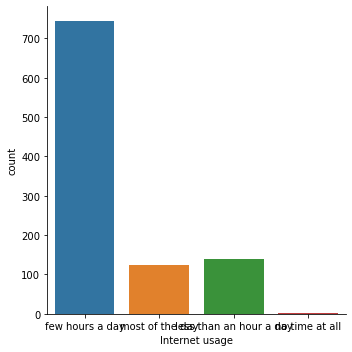

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dataset
survey_data = pd.read_csv('datasets\young-people-survey-responses.csv')

# Create count plot of internet usage
sns.catplot(x="Internet usage",
            data=survey_data,
            kind="count")
# Show plot
plt.show()

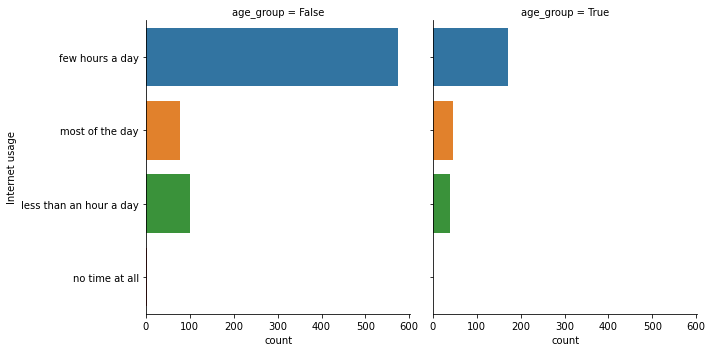

In [6]:
# Create a new col based on age>21 and age<21
survey_data['age_group'] = survey_data['Age'] > 21

# Separate into column subplots based on age category
sns.catplot(y="Internet usage",
            data=survey_data,
            col="age_group",
            kind="count")
# Show the plot
plt.show()

## Exercise I

### Bar plots with percentages

Let's continue exploring the responses to a survey sent out to young people. The variable ```Interested in Math``` is ```True``` if the person reported being interested or very interested in mathematics, and ```False``` otherwise.

What percantage of young people report being interested in math, and does this vary based on gender?

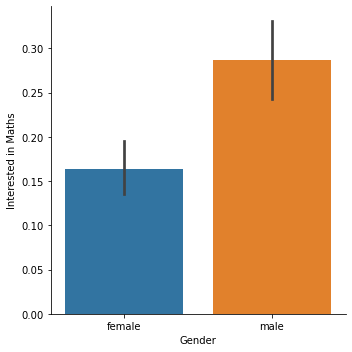

In [7]:
# Creating a subplot "Interested in Math"
survey_data['Interested in Maths'] = survey_data['Mathematics'] > 3
# Create a bar plot of interest in math, separated by gender
sns.catplot(x="Gender",
            y="Interested in Maths",
            data=survey_data,
            kind="bar")
# Show plot
plt.show()

## Exercise I 

### Customizing bar plots

In this exercise, we'll explore data from students in secondary school.

The ```"study_time"```variable record each student's reported weekly study time as one of the following categories:

* ```"<2 hours"```
* ```"2 to 5 hours"```
* ```"5 to 10 hours"```
* ```">10 hours"```

Do students who report higher amounts of studying tend to get better final grades?

Let's compare the average final grade among students in each category using a bar plot.

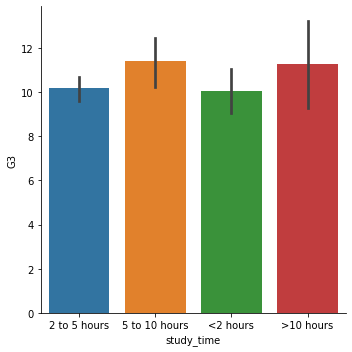

In [8]:
# Dataset
student_data = pd.read_csv('datasets\student-alcohol-consumption.csv')

# Create bar plot of average final grade in each study category
sns.catplot(x="study_time",
            y="G3",
            data=student_data,
            kind="bar")

# Show plot
plt.show()


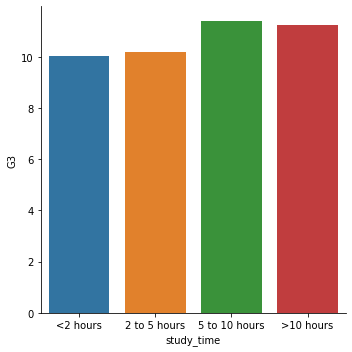

In [9]:
# List of categories from lowest to highest
category_order = ["<2 hours",
                  "2 to 5 hours",
                  "5 to 10 hours",
                  ">10 hours"]

# Rearrange the categories
sns.catplot(x="study_time",
            y="G3",
            data=student_data,
            order=category_order,
            # Update the plot so that it no longer displays confidence intervals
            ci=None,
            kind="bar")

# Show plot
plt.show()

# Chapter III -II-

## Creating a Box Plot

### What is a box plot?

A box plot shows the distrubition of quantitative data. The colored box represents the 25th to 75th percentile, and the line in the middle of the box represents the median. The whiskers give a sense of the spread of the distrubition, and the floating points represent outliers. Box plots are commonly used as a way to compare the distribution of a quantitative variable accross different groups of a categorical variable.

* Shows the distrubition of quantitative data

* See median, spread, skewness, and outliers

* Facilitates comparisons between groups

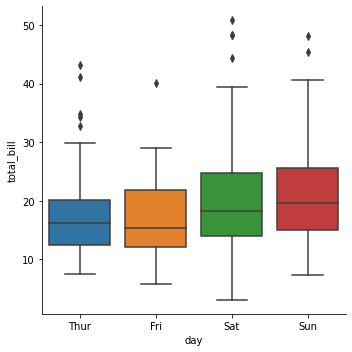

In [10]:
# Dataset is tips

# Create a box plot
g = sns.catplot(x="day",
                y="total_bill",
                data=tips,
                kind="box")

# Show the plot
plt.show()

### Omitting the outliers using "sym"

You may want to omit the outliers from your box plot. You can do this using the **"sym"** parameter.

If you pass an empty string into "sym", it will omit the outliers from your plot alltogether.

"Sym" can also be used to change the appearance of the outliers instead of omitting them. 

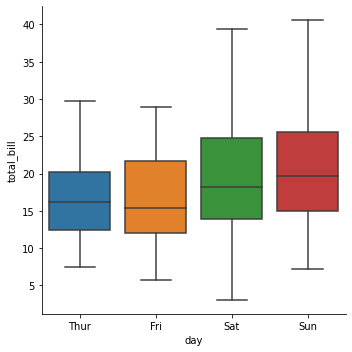

In [11]:
g = sns.catplot(x="day",
                y="total_bill",
                data=tips,
                kind="box",
                sym="")

plt.show()

### Changing the whiskers using "whis"

By default, the whiskers extend to 1 point 5 times the interquartile range, or **"IQR"**.

* The IQR is the 25th to the 75th percentile of a distrubition of data

If you want to change the way the whiskers in your box plot are defined, you can do this using the "whis" parameter.

* Make them extend to 2.0 * IQR : ```whis=2.0```

* Show the 5th and 95th percentiles: ```whis=[5, 95]```

* Show min and max values: ```whis=[0, 100]```


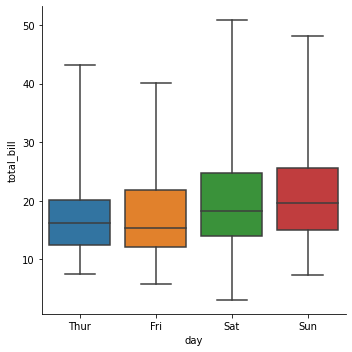

In [12]:
g = sns.catplot(x="day",
                y="total_bill",
                data=tips,
                kind="box",
                whis=[0, 100])

plt.show()

## Exercise II

### Create and interpret a box plot

Let's continue using the ```student_data``` dataset. In an earlier execise, we explored the relationship between studying and final grade byu using a bar plot to compare the average final grade(```"G3"```) among students in different categories of ```"study_time"```

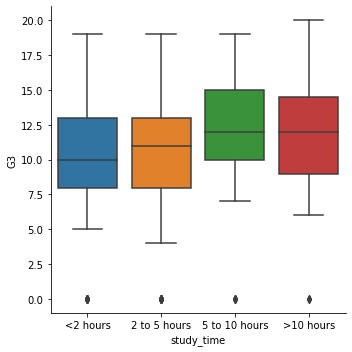

In [13]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours",
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
g = sns.catplot(x="study_time",
                y="G3",
                data=student_data,
                kind="box",
                order=study_time_order)

# Show plot
plt.show()

## Exercise II 

### Omitting outliers

Let's use the ```student_data```dataset to compare the distrubition of final grades (```"G3"```) between students who have internet acces at home and those who don't.

To do this, we'll use the ```"internet"``` variable, which is a binary (yes/no) indicator of whether the student has internet access at home.

Since internet may be less accessible in rural areas, we'll add subgroups based on where the student lives. For this, we can use the ```"location"``` variable, which is an indicator of whether a student lives in an urban("Urban") or rural("Rural") location.

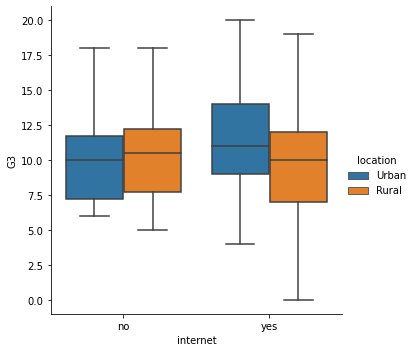

In [14]:
# Create a box plot with subgroups and omit the outliers
g = sns.catplot(x="internet",
                y="G3",
                data=student_data,
                kind="box",
                sym="",
                hue="location")

# Show plot
plt.show()

## Exercise II

### Adjusting the whiskers

In this exercise we'll continue to use the ```student_data``` dataset to compare the distrubition of final grades between students who are in a romantic relationship and those that are not.

We'll use the ```"romantic"``` variable, which is a yes/no indicator of whether the student is in a romantic relationship.

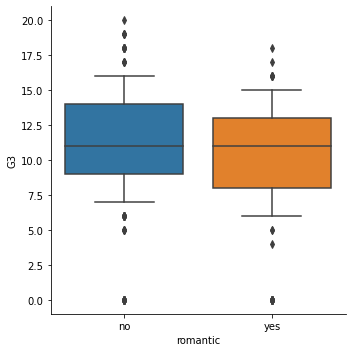

In [15]:
# Set the whiskers to 0.5 * IQR
sns.catplot(x="romantic",
            y="G3",
            data=student_data,
            kind="box",
            whis=0.5)

# Show plot
plt.show()

# Chapter III -III-

## Point Plots

### What are point plots?

Point plot show the mean of quantitative variable for the observations in each category, plotted as a single point. 

The vertical bars extending above and below the mean represent the 95% confidence intervals for that mean.

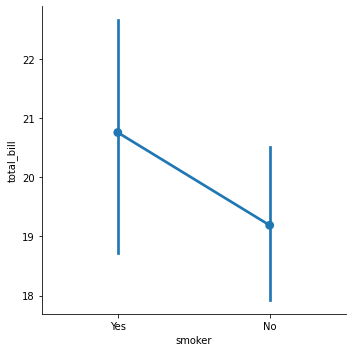

In [16]:
sns.catplot(x="smoker",
            y="total_bill",
            data=tips,
            kind="point")

plt.show()

### Point plots vs Line plots

Both line plots and point plots show the mean of a quantitative variable and 95% confidence intervals for the mean. However, there is a key difference. 

Line plots are relational plots, so both the x- and y-axis are quantitative variables. In a point plot, one axis - usually the x-axis - is a categorical variable, making it a categorical plot.

Both show:

* Mean of quantitative variable

* 95% confidence intervals for the mean

Differences: 

* Line plot has **quantitative** variable (usually time) on x-axis

* Point plot has **categorical** variable on x-axis

### Creating a point plot

We use "catplot" and set "kind" equal to "point"

### Disconnecting the points

We set the "join" parameter equal to False.

### Displaying the median

Import the median function from the numpy library and set "estimator" equal to the numpy median function.

Why might you want to use the median instead of mean?

The median is more robust to outliers, so if your dataset has a lot of outliers, the median may be a better statistic to use.

### Customizing the confidence intervals

Set the "capsize" parameter equal to the desired width of the caps. Eg: 0.2

### Turning of confidence intervals

Set the "ci" parameter equal to None

## Exercise III

### Customizing point plots

Let's continue to look at the data from students in secondary school, this time using a point plot to answer the question:

Does the quality of the student's family relationship influence the number of absences the student has in school?

Here, we'll use the ```"famrel"```variable, which describes the quality of a student's family relationship from 1(very bad) to 5(very good).

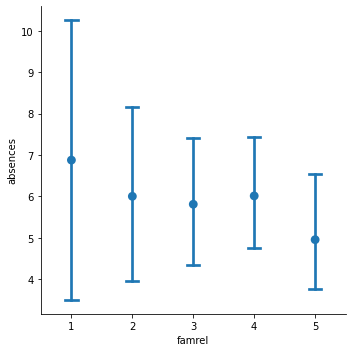

In [19]:
# Create a point plot of family relationship vs. absences
sns.catplot(x="famrel",
            y="absences",
            data=student_data,
            kind="point",
            # Add caps to the confidence interval
            capsize=0.2,
            # Remove the lines joining the points
            join= False)

# Show plot
plt.show()

## Exercise III

### Point plots with subgroups

This time, we'll ask the question:

Is being in a romantic relationship associated with higher or lower school attendance?

and does this association differ by which school the students attend?

Let's find out using a point plot.

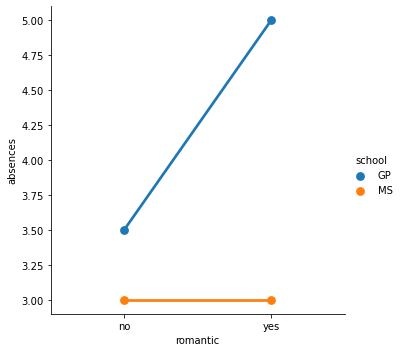

In [22]:
# Import median function from numpy
from numpy import median

# Create a point plot that uses color to create subgroups
sns.catplot(x="romantic",
            y="absences",
            data=student_data,
            kind="point",
            hue="school",
            # turn off the confidence intervals for this plot
            ci=None,
            # Use the numpy median function to display median
            estimator= median)

# Show plot
plt.show()